In [1]:
from google.colab import drive
import sys
import os

drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/capstone_code")
sys.path.append("/content/drive/My Drive/capstone_code/p_file")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

from visualization.plotting import plot_pose, plot_pose_visible

data = pd.read_csv('./processed_penn_data.csv', index_col=[0]).reset_index(drop=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from preprocessing.serialization import serialize_data_encoding

train_input, train_label = serialize_data_encoding(data, save_path='./', save=True)
from sklearn.model_selection import train_test_split
train_input, val_input, train_label, val_label = train_test_split(train_input, train_label, test_size=0.2)

Data exists, loading...


In [0]:
from models.data_generator import data_generator_en

train_generator = data_generator_en(train_input, train_label, batch_size=256)
val_generator = data_generator_en(val_input, val_label, batch_size=256, augmented=False)

In [0]:
# from models.construction import Model_expand, Model_contract
# model_path = "./vae_contract.model"
# model_1 = Model_contract(save_dir=model_path)

# history1 = model_1.training_generator(train_generator, val_generator, 500, 200, n_epoch=80)
# np.array(history1.history['mean_absolute_error']).dump("./en_h1_tmae")
# np.array(history1.history['val_mean_absolute_error']).dump("./en_h1_vmae")
# np.array(history1.history['loss']).dump("./en_h1_tmse")
# np.array(history1.history['val_loss']).dump("./en_h1_vmse")

In [0]:
# model_path = "./vae_expand.model"
# model_2 = Model_expand(save_dir=model_path, latent_dim=80, n_latent_layer=2, early_stop=False)
# history2 = model_2.training_generator(train_generator, val_generator, 500, 200, n_epoch=80)
# np.array(history2.history['mean_absolute_error']).dump("./en_h2_tmae_new")
# np.array(history2.history['val_mean_absolute_error']).dump("./en_h2_vmae_new")
# np.array(history2.history['loss']).dump("./en_h2_tmse_new")
# np.array(history2.history['val_loss']).dump("./en_h2_vmse_new")

In [0]:
# model_path = "./vae_expand_120.model"
# model_3 = Model_expand(save_dir=model_path, latent_dim=120, n_latent_layer=3, early_stop=False)
# history3 = model_3.training_generator(train_generator, val_generator, 500, 200, n_epoch=80)
# np.array(history3.history['mean_absolute_error']).dump("./en_h3_tmae")
# np.array(history3.history['val_mean_absolute_error']).dump("./en_h3_vmae")
# np.array(history3.history['loss']).dump("./en_h3_tmse")
# np.array(history3.history['val_loss']).dump("./en_h3_vmse")

In [0]:
# model_path = "./vae_expand_160.model"
# model_4 = Model_expand(save_dir=model_path, latent_dim=160, n_latent_layer=4, early_stop=False)
# history4 = model_4.training_generator(train_generator, val_generator, 500, 200, n_epoch=50)
# np.array(history4.history['mean_absolute_error']).dump("./en_h4_tmae")
# np.array(history4.history['val_mean_absolute_error']).dump("./en_h4_vmae")
# np.array(history4.history['loss']).dump("./en_h4_tmse")
# np.array(history4.history['val_loss']).dump("./en_h4_vmse")

In [0]:
h1_tmse = np.load('./en_h1_tmse', allow_pickle=True)
h1_vmse = np.load('./en_h1_vmse', allow_pickle=True)
h1_tmae = np.load('./en_h1_tmae', allow_pickle=True)
h1_vmae = np.load('./en_h1_vmae', allow_pickle=True)

h2_tmse = np.load('./en_h2_tmse', allow_pickle=True)
h2_vmse = np.load('./en_h2_vmse', allow_pickle=True)
h2_tmae = np.load('./en_h2_tmae', allow_pickle=True)
h2_vmae = np.load('./en_h2_vmae', allow_pickle=True)

h3_tmse = np.load('./en_h3_tmse', allow_pickle=True)
h3_vmse = np.load('./en_h3_vmse', allow_pickle=True)
h3_tmae = np.load('./en_h3_tmae', allow_pickle=True)
h3_vmae = np.load('./en_h3_vmae', allow_pickle=True)

h4_tmse = np.load('./en_h4_tmse', allow_pickle=True)
h4_vmse = np.load('./en_h4_vmse', allow_pickle=True)
h4_tmae = np.load('./en_h4_tmae', allow_pickle=True)
h4_vmae = np.load('./en_h4_vmae', allow_pickle=True)

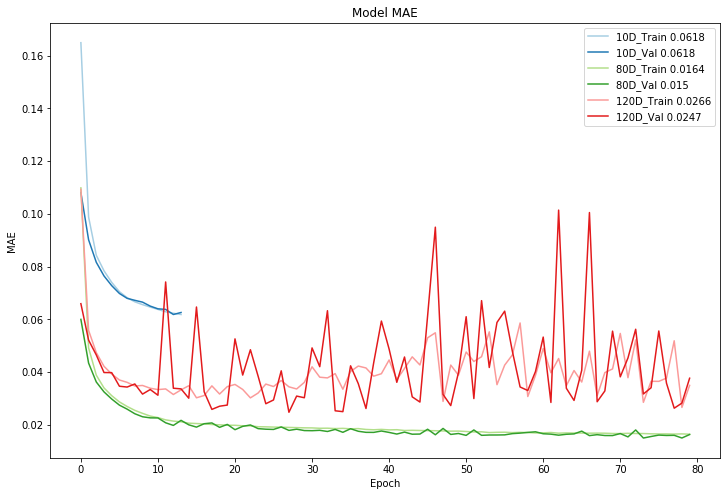

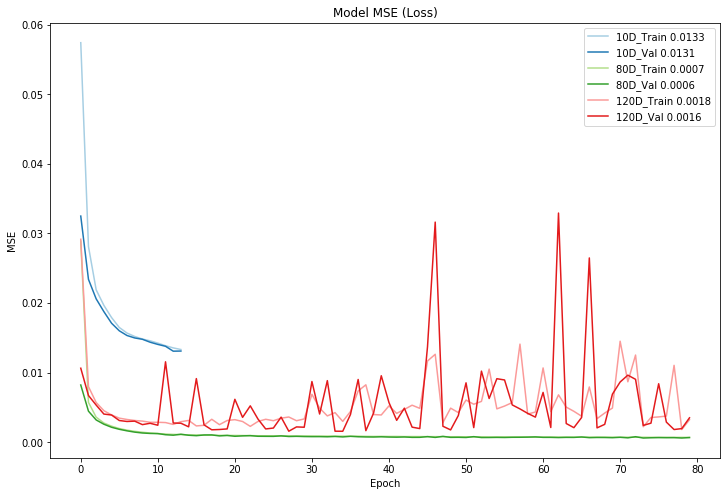

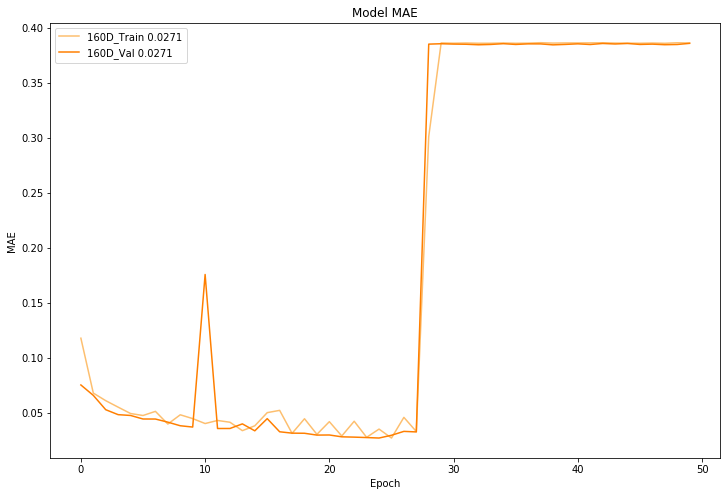

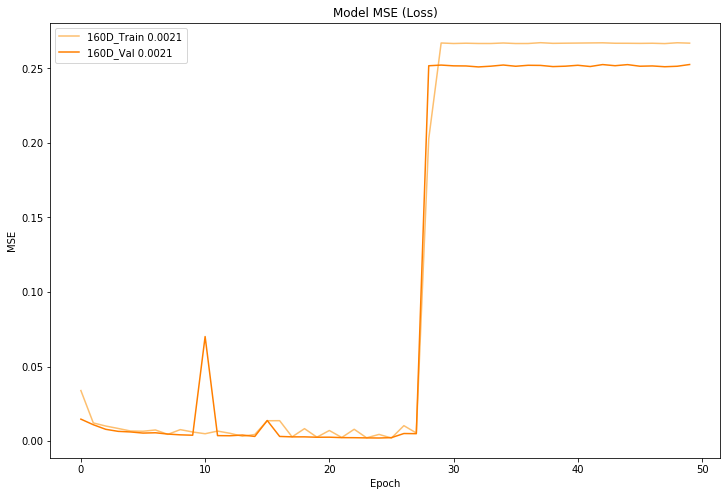

In [55]:
import seaborn as sns
colors = sns.color_palette('Paired', n_colors=8)  

# Plot training & validation MAE values
plt.figure(figsize=(12,8))
names = ['10D_Train', '10D_Val', '80D_Train', '80D_Val', '120D_Train', '120D_Val', '160D_Train', '160D_Val']
for mae, c, name in zip([h1_tmae, h1_vmae, h2_tmae, h2_vmae, h3_tmae, h3_vmae, h4_tmae, h4_vmae][:6], colors[:6], names[:6]):
    plt.plot(range(len(mae)), mae, c=c, label=name+" "+str(round(min(mae), 4)))
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12,8))
names = ['10D_Train', '10D_Val', '80D_Train', '80D_Val', '120D_Train', '120D_Val', '160D_Train', '160D_Val']
for mae, c, name in zip([h1_tmse, h1_vmse, h2_tmse, h2_vmse, h3_tmse, h3_vmse, h4_tmse, h4_vmse][:6], colors[:6], names[:6]):
    plt.plot(range(len(mae)), mae, c=c, label=name+" "+str(round(min(mae), 4)))
plt.title('Model MSE (Loss)')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# Plot training & validation MAE values
plt.figure(figsize=(12,8))
names = ['10D_Train', '10D_Val', '80D_Train', '80D_Val', '120D_Train', '120D_Val', '160D_Train', '160D_Val']
for mae, c, name in zip([h1_tmae, h1_vmae, h2_tmae, h2_vmae, h3_tmae, h3_vmae, h4_tmae, h4_vmae][-2:], colors[-2:], names[-2:]):
    plt.plot(range(len(mae)), mae, c=c, label=name+" "+str(round(min(mae), 4)))
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12,8))
names = ['10D_Train', '10D_Val', '80D_Train', '80D_Val', '120D_Train', '120D_Val', '160D_Train', '160D_Val']
for mae, c, name in zip([h1_tmse, h1_vmse, h2_tmse, h2_vmse, h3_tmse, h3_vmse, h4_tmse, h4_vmse][-2:], colors[-2:], names[-2:]):
    plt.plot(range(len(mae)), mae, c=c, label=name+" "+str(round(min(mae), 4)))
plt.title('Model MSE (Loss)')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [0]:
# embedded = -np.ones(shape=(1, 80))
# for _ in range(data.shape[0]):
#     if _ % 5000 == 0: 
#         print('At {}...'.format(_))
#     pred = model.encoder.predict(np.array(data.iloc[_, 2:41]).reshape(1,-1))
#     embedded = np.append(embedded, pred, axis=0)

In [0]:
embedded.dump("./embedded_full")

In [0]:
embedded = np.load("./embedded_full", allow_pickle=True)

In [0]:
new_d = embedded[1:]

In [0]:
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
label = en.fit_transform(data['action'])

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
new = lda.fit_transform(new_d, label)

lda_org = LinearDiscriminantAnalysis(n_components=2)
new_org = lda.fit_transform(data.iloc[:, 2:41], label)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


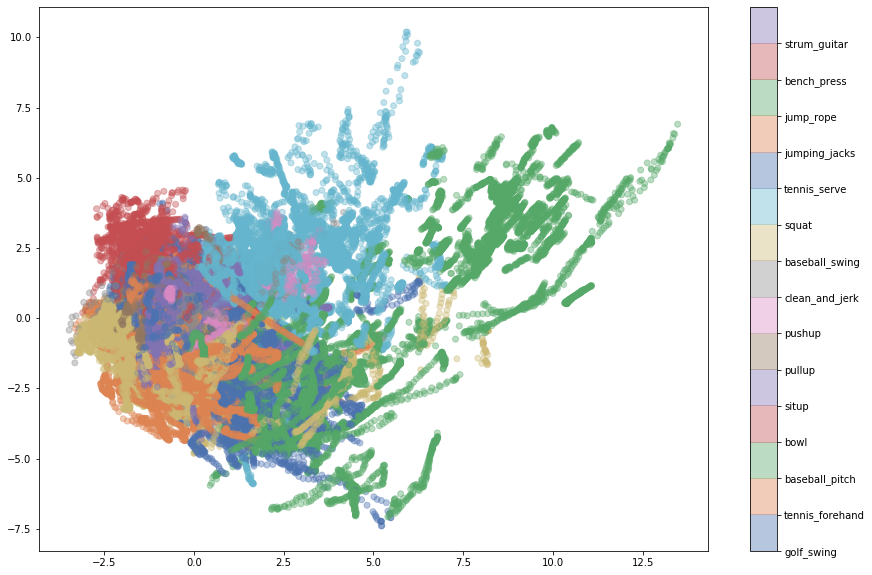

In [0]:
colors = sns.color_palette('deep', n_colors=15)  
plt.figure(figsize=(15,10))
plt.scatter(new[:,0], new[:,1], c=label, alpha=0.4, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(data['action'].unique())
plt.show()

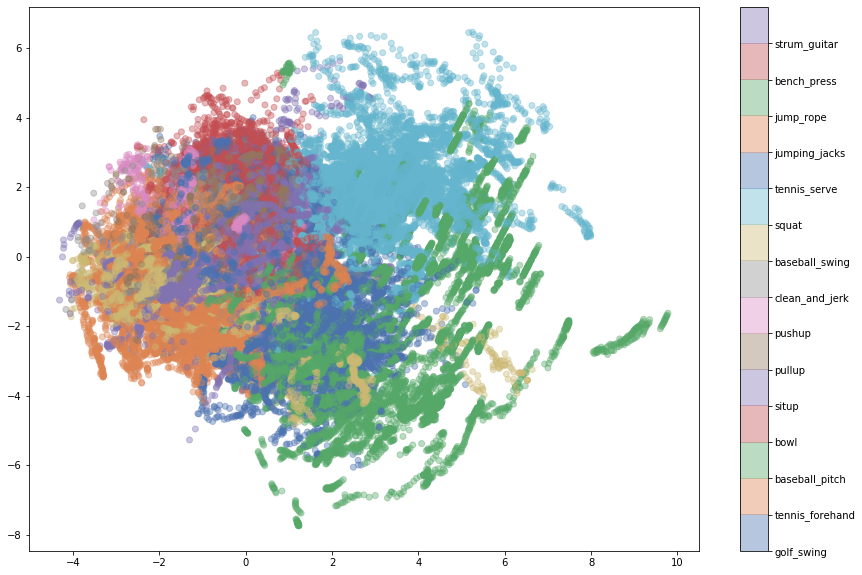

In [0]:
plt.figure(figsize=(15,10))
plt.scatter(new_org[:,0], new_org[:,1], c=label, alpha=0.4, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(data['action'].unique())
plt.show()

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()
label = en.fit_transform(data['action'])

train_input, val_input, train_label, val_label = train_test_split(embedded[1:], label, test_size=0.2)
train_input_org, val_input_org, train_label_org, val_label_org = train_test_split(data.iloc[:, 2:41], label, test_size=0.2)

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=500).fit(train_input, train_label)
val_preds = clf.predict(val_input)
acc = accuracy_score(val_label, val_preds)
print('Baseline accuracy:', acc)


clf_org = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=500).fit(train_input_org, train_label_org)
val_preds_org = clf_org.predict(val_input_org)
acc = accuracy_score(val_label_org, val_preds_org)
print('Baseline accuracy:', acc)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Baseline accuracy: 0.6670938997222985
Baseline accuracy: 0.6170771155665415


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [0]:
from keras.models import load_model
load_model = load_model("./vae_expand_80.model")

def plot_pose_visible(xs, ys, vis, w, h):
    import matplotlib.pyplot as plt
    pairs = [[0,1], [0,2], [1, 3], [3, 5], [2, 4], [4, 6], [1, 7], [2,8], [7, 9], [9, 11], [8, 10], [10, 12], [7, 8]]
    # plt.figure(figsize=(12,8))
    ys = h - ys
    vis = list(vis)
    # print(vis)
    plt.scatter(xs[vis], ys[vis])
    for pair in pairs:
        vis_or_not = [vis[point] for point in pair]
        if all(vis_or_not):
            plt.plot(xs[pair], ys[pair], lw=5)
    plt.xlim(0, w)
    plt.ylim(0, h)
    plt.xticks([])
    plt.yticks([])
    # plt.show()

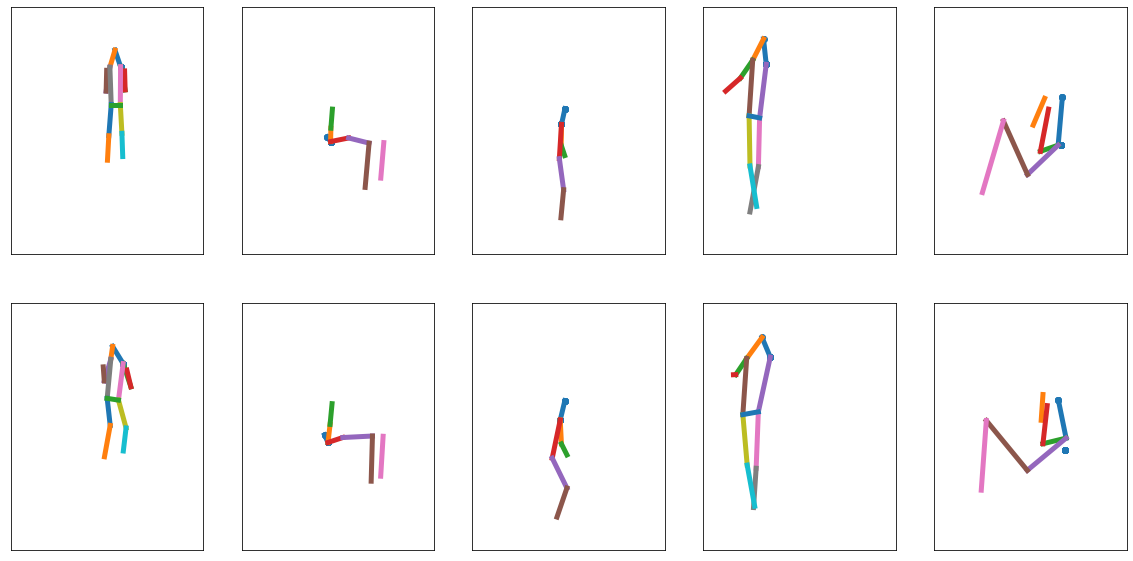

In [68]:
choices = np.random.choice(np.arange(val_input.shape[0]), 5)

plt.figure(figsize=(20, 10))
l = [1, 2, 3, 4, 5]
for i, j in zip(choices, range(len(choices))):
    plt.subplot(2, 5, l[j])
    plot_pose_visible(val_input[i, :13], val_input[i, 13:26], np.array(val_input[i, 26:], dtype=int), 1, 1)
    pred = load_model.predict(val_input[i].reshape(1,-1))
    pred[0, 26:] = [1 if _ > 0.5 else 0 for _ in pred[0, 26:]]
    plt.subplot(2, 5, l[j]+5)
    plot_pose_visible(pred[0,:13], pred[0, 13:26], np.array(pred[0, 26:], dtype=int), 1, 1)